### Weekly Sales prediction on Walmart sales dataset

We have downloaded dataset from https://www.kaggle.com/datasets/yasserh/walmart-dataset, to predict the weekly Sales of Walmart. After loading the dataset, we have performed EDA and data visualization. With the help of heatmap we concluded that Flue_Price and year features are highly corelated. We have used liner regression and Random forest regressor for prediction. Accuracy of the two is-

1. Linear Regression- 14%
2. Random forest Regressor-96%

In [1]:
#Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Ignore  all the warnings
import warnings 
warnings.filterwarnings('ignore')

df=pd.read_csv("Walmart.csv")

In [2]:
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [5]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [8]:
df.nunique().sort_values()

Holiday_Flag       2
Store             45
Date             143
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

In [9]:
df.shape

(6435, 8)

In [10]:
# converting Date column from object to Data format
df['Date']=pd.to_datetime(df.Date)

In [11]:
import datetime as dt

df['weekday'] = df.Date.dt.weekday
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year


In [17]:
df.head(4)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010


In [15]:
df.drop('Date', axis=1, inplace=True)

C:\ProgramData\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


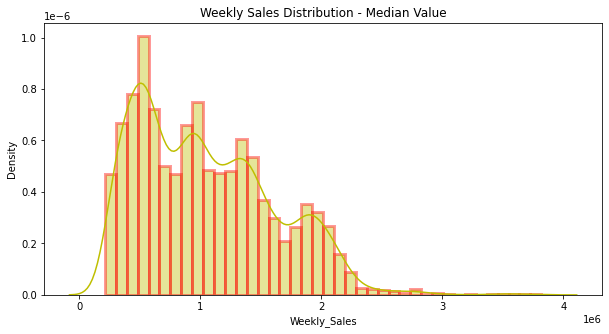

In [27]:
#Let us first analyze the distribution of the target variable- Weekly Sales

plt.figure(figsize=[10,5])
sns.distplot(df['Weekly_Sales'], color='y',hist_kws=dict(edgecolor="red", linewidth=3), bins=40)
plt.title('Weekly Sales Distribution - Median Value')
plt.show()

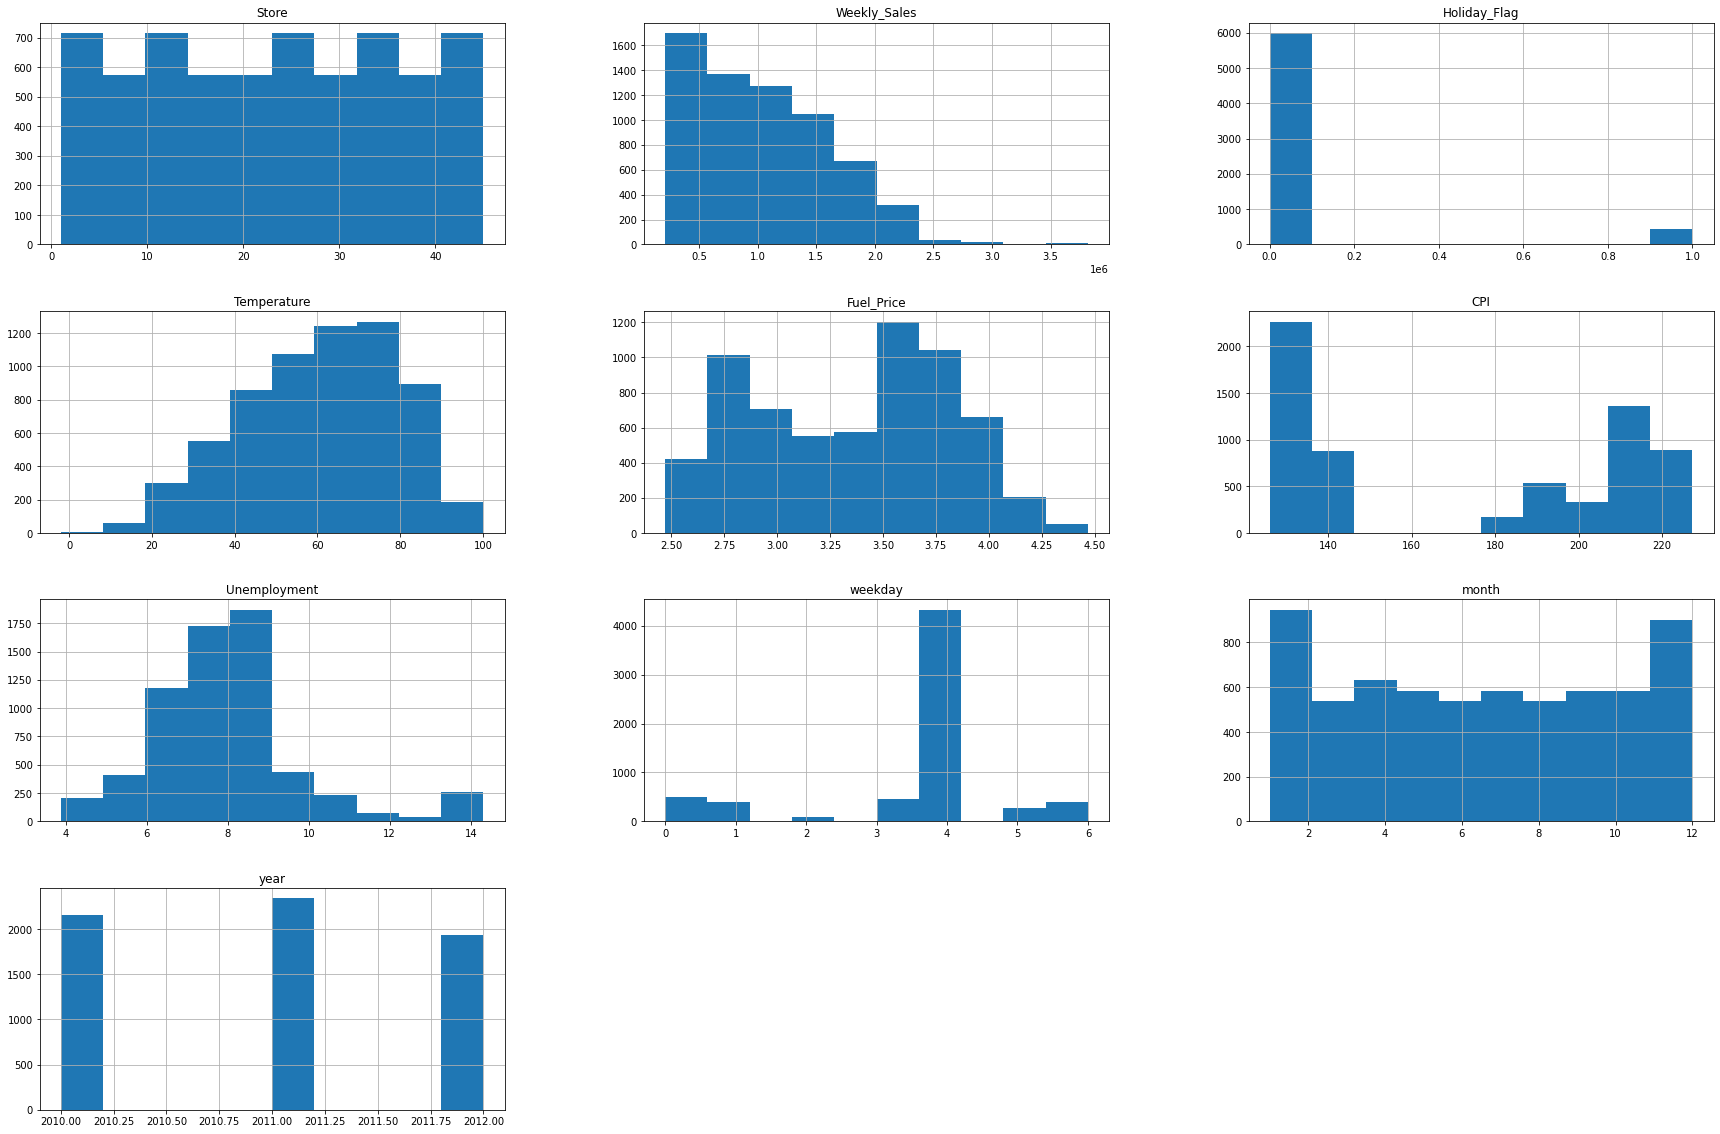

In [111]:
# histograms for all the columns

df.hist(figsize=(30,20));

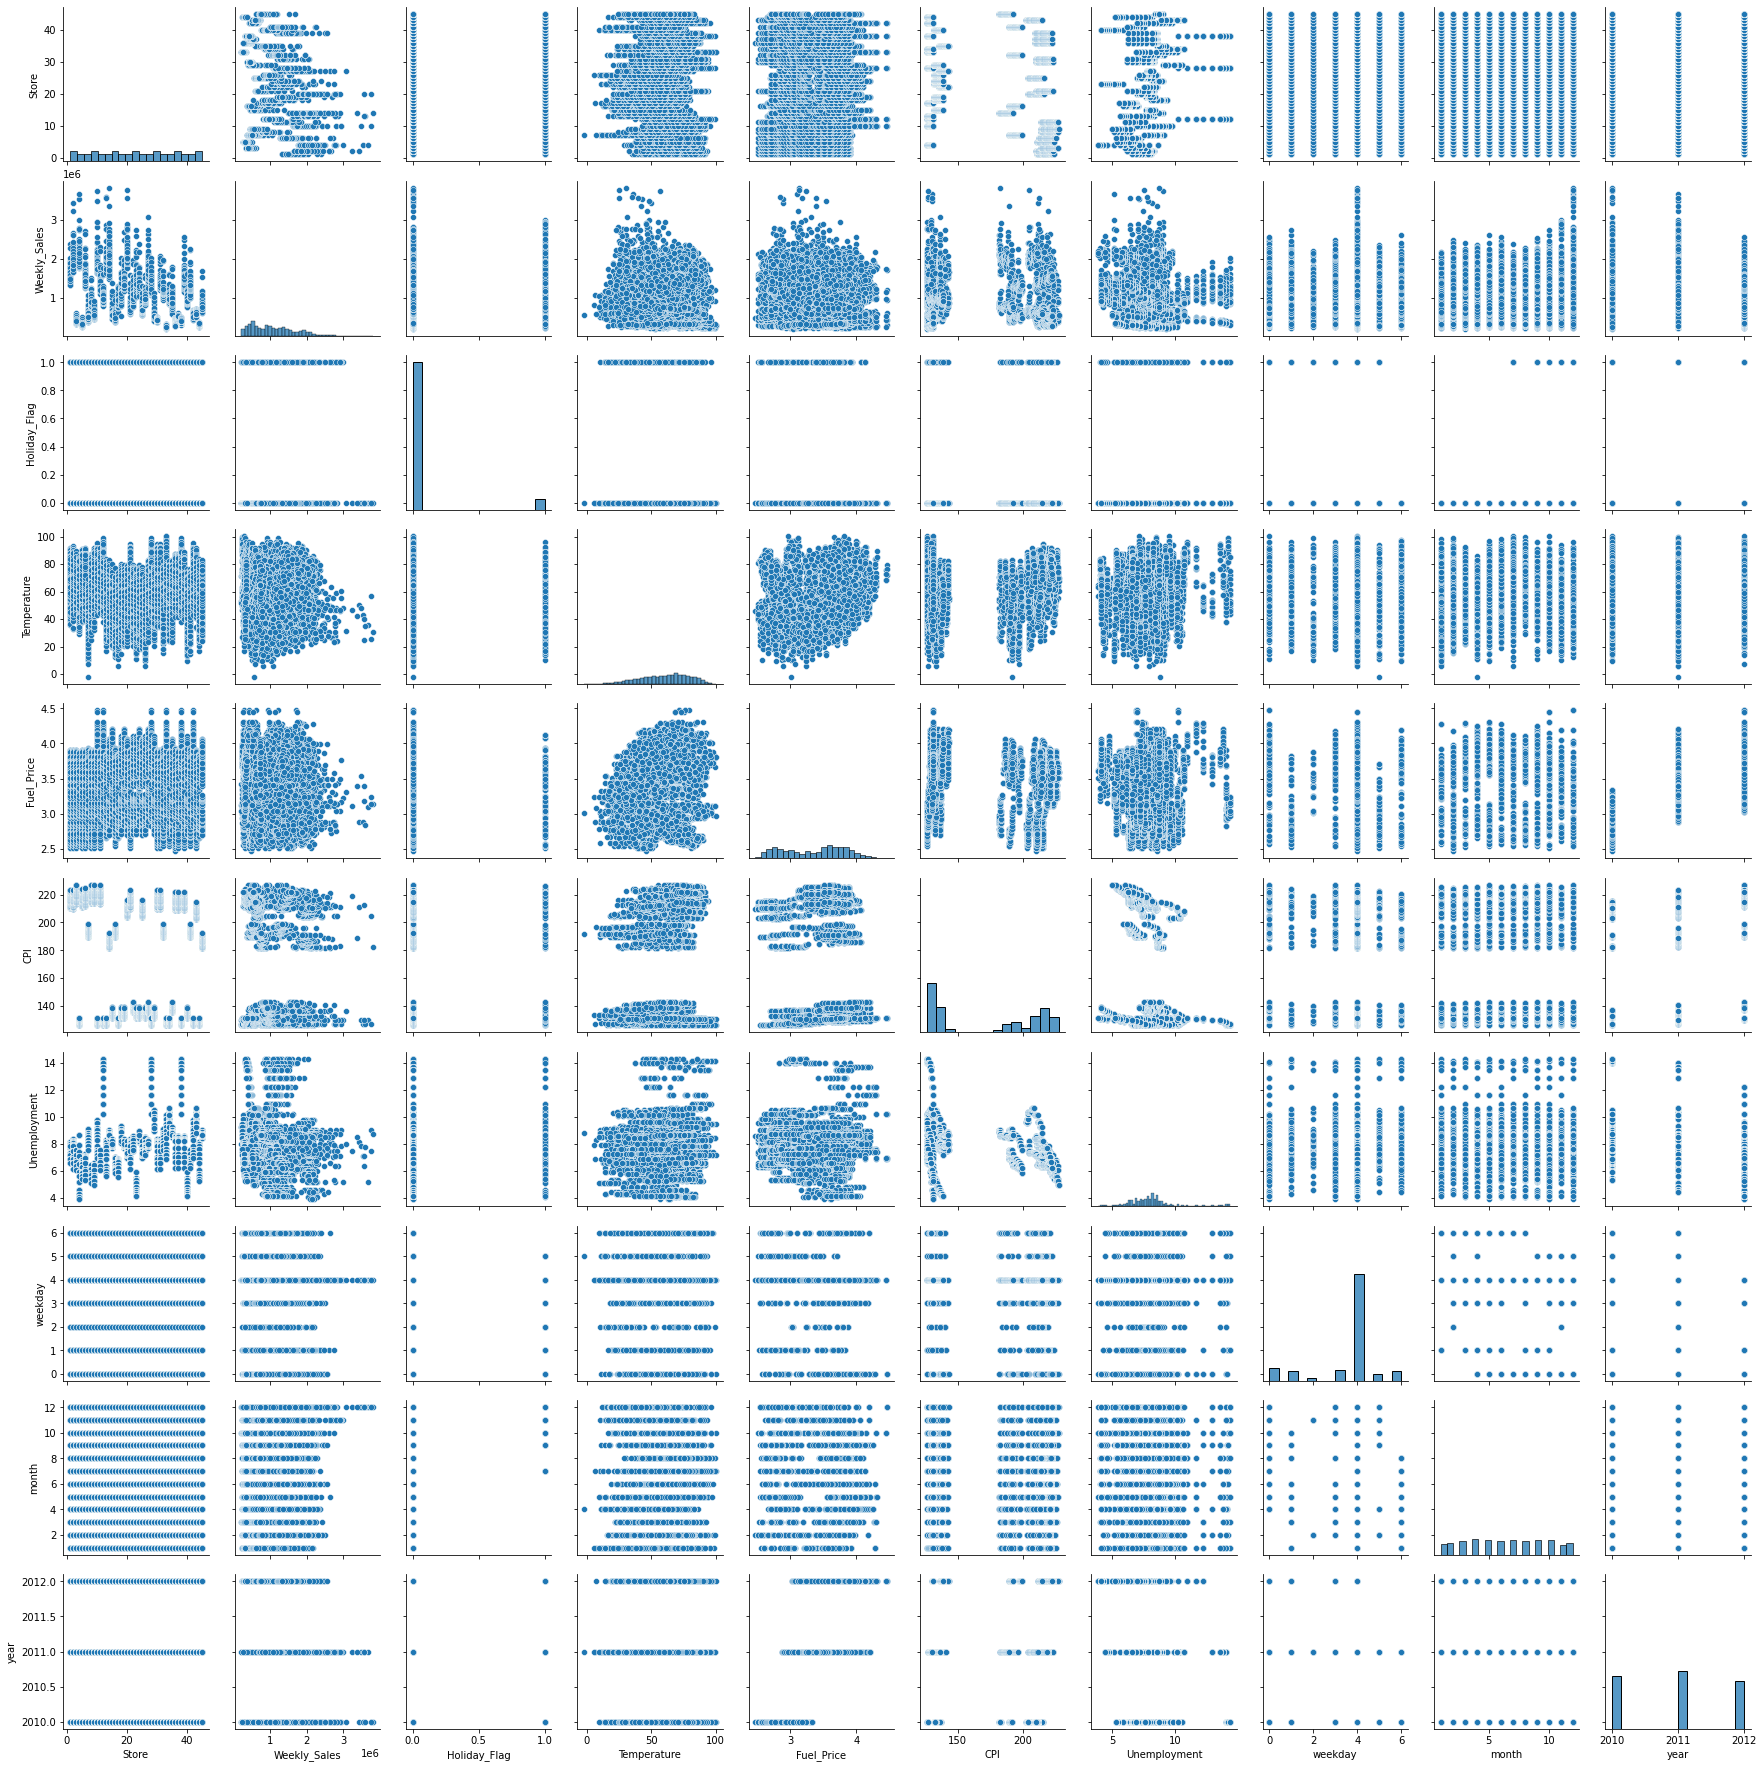

In [151]:
sns.pairplot(df)

In [113]:
# More data Analysis to visulalize the pattern of the sales

# create the pivot table
pivot_table = df.pivot_table(index='month', columns='year', values='Weekly_Sales')
# display the pivot table
pivot_table

year,2010,2011,2012
month,,,
1,9.386639e+05,9.420697e+05,9.567817e+05
2,1.064372e+06,1.042273e+06,1.057997e+06
3,1.034590e+06,1.011263e+06,1.025510e+06
4,1.021177e+06,1.033220e+06,1.014127e+06
5,1.039303e+06,1.015565e+06,1.053948e+06
6,1.055082e+06,1.038471e+06,1.082920e+06
7,1.023702e+06,9.976049e+05,1.025480e+06
8,1.025212e+06,1.044895e+06,1.064514e+06
9,9.983559e+05,1.026810e+06,9.988663e+05


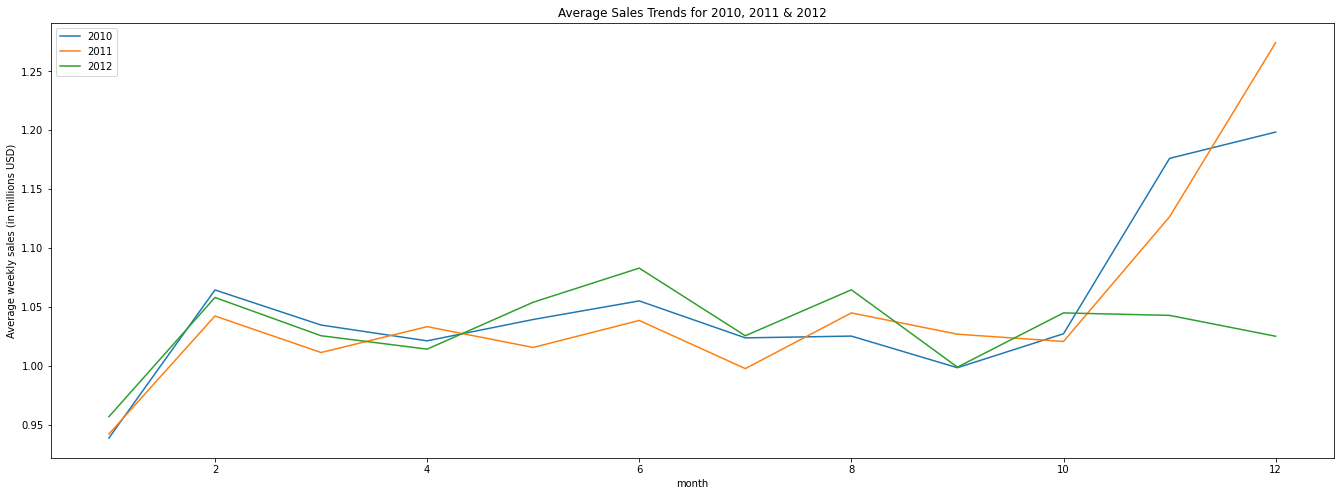

In [116]:
# plot the average sales

fig, ax = plt.subplots(figsize=(23, 8))

sns.lineplot(x=pivot_table.index, y=pivot_table[2010]/1e6, ax=ax, label='2010')
sns.lineplot( x=pivot_table.index, y=pivot_table[2011]/1e6, ax=ax, label='2011')
sns.lineplot( x=pivot_table.index, y=pivot_table[2012]/1e6, ax=ax, label='2012')

plt.ylabel('Average weekly sales (in millions USD)')
plt.title('Average Sales Trends for 2010, 2011 & 2012')

# Add a legend
plt.legend()
plt.show()


<AxesSubplot:xlabel='Store'>

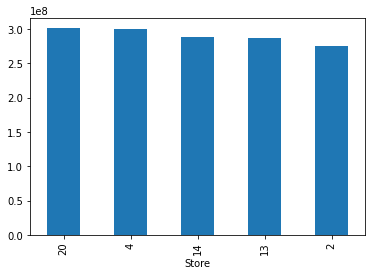

In [122]:
# top five stores to have maximum sale
df.groupby(['Store']).Weekly_Sales.sum().sort_values(ascending=False).head(5).plot.bar()

<AxesSubplot:xlabel='Store'>

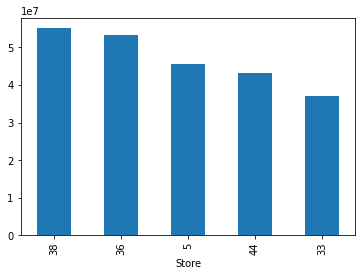

In [123]:
# top five stores with least sales

df.groupby(['Store']).Weekly_Sales.sum().sort_values(ascending=False).tail(5).plot.bar()

<AxesSubplot:xlabel='Holiday_Flag'>

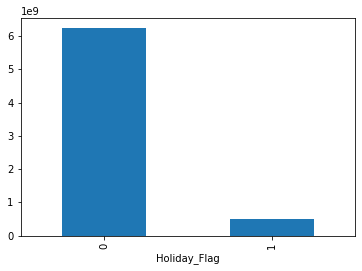

In [125]:
# sales on non-holiday days  vs holiday days
df.groupby(['Holiday_Flag']).Weekly_Sales.sum().plot.bar()

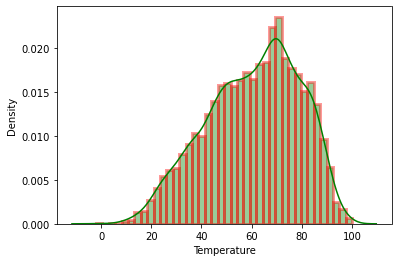

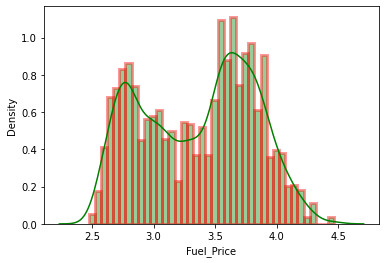

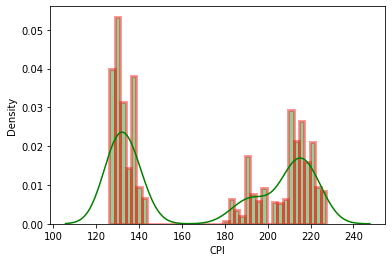

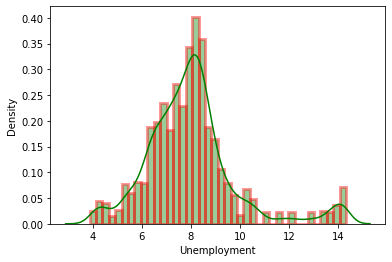

In [220]:
# visualizing the distribution of features

for col in df[['Temperature','Fuel_Price','CPI','Unemployment']]:
    sns.distplot(df[col], color='g',hist_kws=dict(edgecolor="red", linewidth=3), bins=40)
    plt.show()    

<AxesSubplot:>

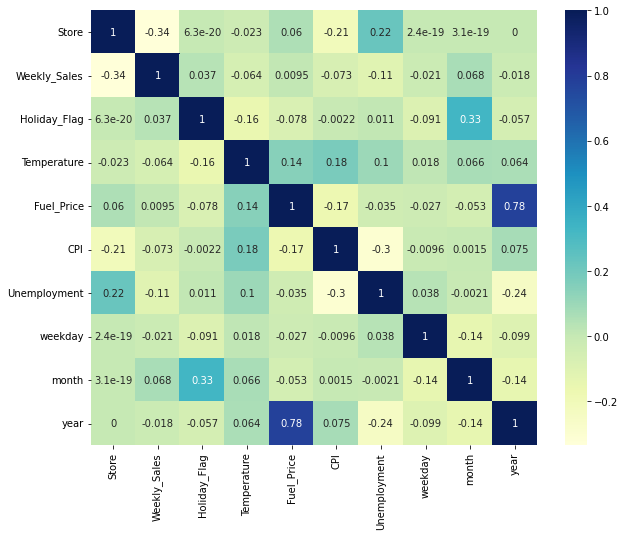

In [69]:
#Checking the correlation with the  features

plt.figure(figsize=[10,8])
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [67]:
# checking for multicolinearity 

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(df)

pd.DataFrame([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns, columns={'VIF_Score'})

,VIF_Score
const,2.101628e+07
Store,1.228153e+00
Weekly_Sales,1.172394e+00
Holiday_Flag,1.175493e+00
Temperature,1.165431e+00
Fuel_Price,3.241341e+00
CPI,1.376032e+00
Unemployment,1.278953e+00
weekday,1.048174e+00
month,1.211642e+00


In [210]:
# removing outliers 

import numpy as np
from scipy import stats

df_filtered =df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [211]:
df_filtered

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010
5,1,1439541.59,0,57.79,2.667,211.380643,8.106,4,12,2010
...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,4,9,2012
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,3,5,2012
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,0,12,2012
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,4,10,2012


In [212]:
df.shape

(6435, 10)

In [213]:
y=df_filtered['Weekly_Sales']
df_filtered.drop('Weekly_Sales', axis=1, inplace=True)

In [214]:
#feature Scaling

from sklearn.preprocessing import StandardScaler

df_scaled = scaler.fit_transform(df_filtered)

In [225]:
#splittting the data for trainning

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test=train_test_split(df_scaled, y, test_size=0.3, random_state=45)

In [226]:
# using linear regression model 

model = LinearRegression(fit_intercept=True)

#Train the model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [196]:
#Calculating model co-ef

pd.DataFrame( model.coef_, index=df_filtered.columns)

,0
Store,-1.879860e+05
Holiday_Flag,2.546585e-11
Temperature,1.052095e+04
Fuel_Price,2.701281e+04
CPI,-9.410952e+04
Unemployment,-3.288529e+04
weekday,-2.064496e+04
month,-4.098025e+03
year,-1.985752e+04


In [233]:
print('Coefficients: ', model.intercept_)

Coefficients:  1040741.0742891172


In [198]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mse

239704027571.1661

In [200]:
# accuracy of the model 

from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.14655889419414236


### Using Random forest Regressor 

In [217]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 30)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

y_pred=regressor.predict(X_test)

In [218]:
# Compute mean squared error
mse = mean_squared_error(y_test, y_pred)
# Print results
print(mse)

11537769466.386154


In [219]:
# accuracy of model 

print(r2_score(y_test,y_pred))

0.9605761226441406
